In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("Salary_Data.csv")

In [3]:
print(df.head())

   YearsExperience  Salary
0              1.1   39343
1              1.3   46205
2              1.5   37731
3              2.0   43525
4              2.2   39891


In [4]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 612.0 bytes
None


In [5]:
print(df.describe())

       YearsExperience         Salary
count        30.000000      30.000000
mean          5.313333   76003.000000
std           2.837888   27414.429785
min           1.100000   37731.000000
25%           3.200000   56720.750000
50%           4.700000   65237.000000
75%           7.700000  100544.750000
max          10.500000  122391.000000


In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df.drop("Salary", axis=1).values.reshape(-1, df.shape[1] - 1), df["Salary"].values.reshape(-1, 1), test_size=0.2, random_state=0)

X_b = np.c_[np.ones((len(X_train), 1)), X_train]

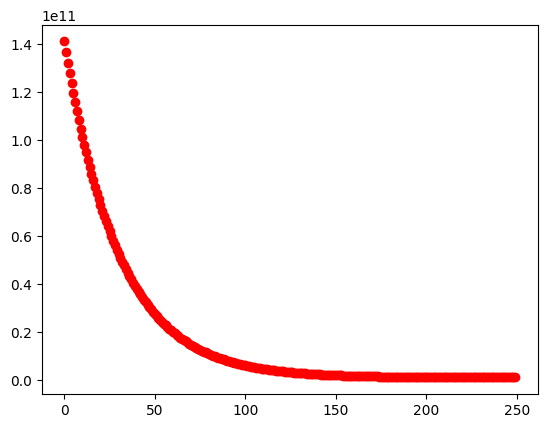

In [7]:
# Calculate Cost Function
def CostFunction(theta):
    val = X_b.dot(theta)
    val -= y_train
    return np.linalg.norm(val, ord=2)**2

# Gradient Descent parameters
learning_rate = 0.06
n_iterations = 250
m = len(X_b)  # number of samples

# Initialize weights randomly
np.random.seed(23)
theta = np.random.randn(2, 1)  # theta is (2, 1) because we have 2 parameters (bias + 1 feature)

# Gradient Descent
for iteration in range(n_iterations):
    gradients = 1/m * X_b.T.dot(X_b.dot(theta) - y_train)  # Compute the gradient
    theta = theta - learning_rate * gradients  # Update weights
    plt.plot(iteration, CostFunction(theta), "ro--", linewidth=80)
    
plt.show()

In [8]:
# Output the final parameters
print("Theta (final parameters):", theta, "\n")

Theta (final parameters): [[25574.03270425]
 [ 9297.26362769]] 



In [9]:
# Make predictions
X_test_b = np.c_[np.ones((len(X_test), 1)), X_test]  # Add the bias term
y_pred = X_test_b.dot(theta)  # Predict using the trained model

In [10]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R-squared: {r2}")

Mean Absolute Error (MAE): 2813.7115615468633
Mean Squared Error (MSE): 11367203.861200735
Root Mean Squared Error (RMSE): 3371.528416193572
R-squared: 0.9895129686734474


In [11]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

In [12]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R-squared: {r2}")

Mean Absolute Error (MAE): 2446.1723690465055
Mean Squared Error (MSE): 12823412.298126549
Root Mean Squared Error (RMSE): 3580.979237321343
R-squared: 0.988169515729126
